<a href="https://colab.research.google.com/github/AleksandrRevuka/Algo_data_science/blob/main/2_Practical_skills_1_2_interpolation_extrapolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [7]:
energy_0 = pd.read_csv("http://video.ittensive.com/machine-learning/ashrae/train.0.0.csv.gz")
energy_0.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,0,0,2016-01-01 01:00:00,0.0
2,0,0,2016-01-01 02:00:00,0.0
3,0,0,2016-01-01 03:00:00,0.0
4,0,0,2016-01-01 04:00:00,0.0


In [12]:
energy_0['timestamp'] = pd.to_datetime(energy_0['timestamp'])
energy_0['hour'] = energy_0['timestamp'].dt.hour
energy_0

,building_id,meter,timestamp,meter_reading,hour
0,0,0,2016-01-01 00:00:00,0.000,0
1,0,0,2016-01-01 01:00:00,0.000,1
2,0,0,2016-01-01 02:00:00,0.000,2
3,0,0,2016-01-01 03:00:00,0.000,3
4,0,0,2016-01-01 04:00:00,0.000,4
...,...,...,...,...,...
8779,0,0,2016-12-31 19:00:00,232.071,19
8780,0,0,2016-12-31 20:00:00,189.069,20
8781,0,0,2016-12-31 21:00:00,169.958,21
8782,0,0,2016-12-31 22:00:00,169.958,22


<Figure size 2000x600 with 0 Axes>

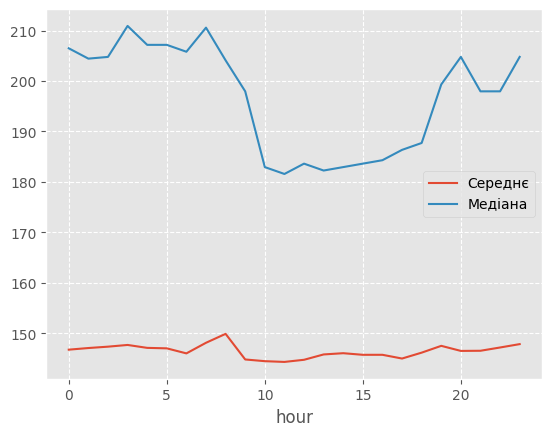

In [19]:
energy_0_hours = energy_0.groupby("hour")
energy_0_averages = pd.DataFrame(
    {"Середнє": energy_0_hours["meter_reading"].agg("mean"),
     "Медіана": energy_0_hours["meter_reading"].agg("median")}
)

plt.style.use('ggplot')

plt.figure(figsize=(20, 6))

energy_0_averages.plot()
plt.grid(linestyle='--')
plt.show()

<Figure size 2000x600 with 0 Axes>

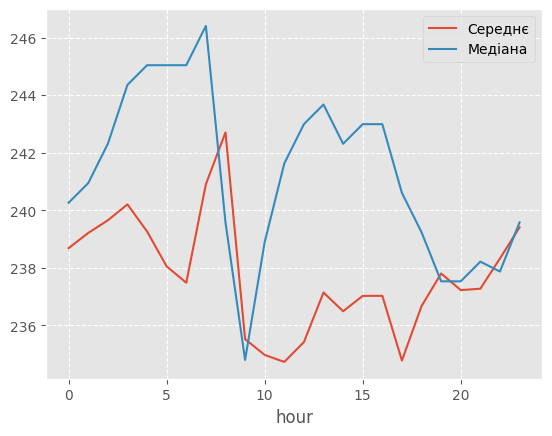

In [21]:
energy_0_hours_filtered = energy_0[energy_0['meter_reading'] > 0].groupby("hour")
energy_0_averages_filtered = pd.DataFrame(
    {"Середнє": energy_0_hours_filtered["meter_reading"].agg("mean"),
     "Медіана": energy_0_hours_filtered["meter_reading"].agg("median")}
)

plt.style.use('ggplot')

plt.figure(figsize=(20, 6))

energy_0_averages_filtered.plot()
plt.grid(linestyle='--')
plt.show()

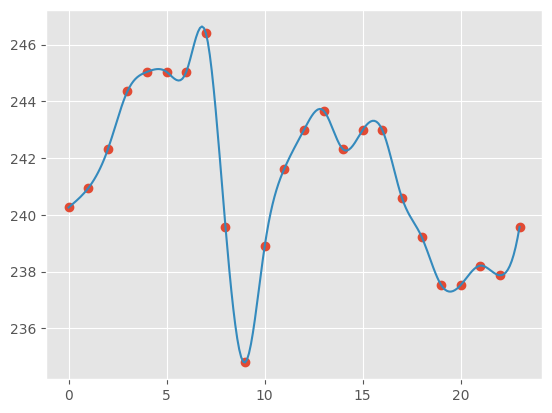

In [25]:
x = np.arange(0, 24)
y  = interp1d(x, energy_0_hours_filtered["meter_reading"].agg("median"), kind="cubic")
xn = np.arange(0, 23.1, 0.1)
yn = y(xn)
plt.plot(x, energy_0_hours_filtered["meter_reading"].agg("median"), "o", xn, yn, "-")
plt.show()